In [103]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.emplike.elanova import ANOVA

In [104]:
data_train = pd.read_csv('Project_Data/train.csv')
data_test = pd.read_csv('Project_Data/test.csv')

In [105]:
data_train.head(3)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.8,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.9,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531


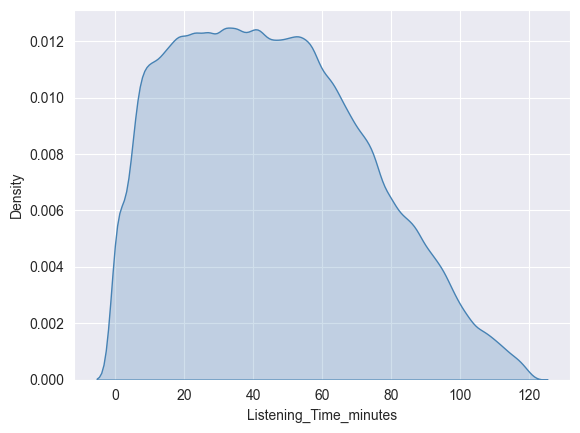

In [106]:
sns.kdeplot(data=data_train, x="Listening_Time_minutes", fill=True, color="steelblue")
plt.show();

In [107]:
#Duplicated values
duplicates_1 = data_test.duplicated().sum()
duplicates_1

np.int64(0)

In [108]:
data_train.describe(include=['O'])

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,750000,750000,750000,750000,750000,750000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87606,115946,196849,251291


In [109]:
data_train.describe().applymap('{:,.2f}'.format)

C:\Users\Rodrigo Santos\AppData\Local\Temp\ipykernel_1460\2709353184.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_train.describe().applymap('{:,.2f}'.format)


,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,"750,000.00","662,907.00","750,000.00","603,970.00","749,999.00","750,000.00"
mean,"374,999.50",64.50,59.86,52.24,1.35,45.44
std,"216,506.50",32.97,22.87,28.45,1.15,27.14
min,0.00,0.00,1.30,0.00,0.00,0.00
25%,"187,499.75",35.73,39.41,28.38,0.00,23.18
50%,"374,999.50",63.84,60.05,53.58,1.00,43.38
75%,"562,499.25",94.07,79.53,76.60,2.00,64.81
max,"749,999.00",325.24,119.46,119.91,103.91,119.97


In [110]:
# See Unique Categories
for col_name in data_train.select_dtypes(include='object').columns:
    print(f"Column '{col_name}':")
    print(data_train[col_name].unique())
    print("-" * 20)

Column 'Podcast_Name':
['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']
--------------------
Column 'Episode_Title':
['Episode 98' 'Episode 26' 'Episode 16' 'Episode 45' 'Episode 86'
 'Episode 19' 'Episode 47' 'Episode 44' 'Episode 32' 'Episode 81'
 'Episode 66' 'Episode 62' 'Ep

In [111]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
columns_encode = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

# To store the fitted encoders and their mappings
encoders = {}
for i in columns_encode:
    le = LabelEncoder()
    data_train[i] = le.fit_transform(data_train[i])
    encoders[i] = {label: index for index, label in enumerate(le.classes_)}

print("\n--- Label Encoding Mappings ---")
for col, mapping in encoders.items():
    print(f"\nColumn: '{col}'")
    sorted_mapping = dict(sorted(mapping.items(), key=lambda item: item[1]))
    for label, index in sorted_mapping.items():
        print(f"  '{label}' -> {index}")


--- Label Encoding Mappings ---

Column: 'Podcast_Name'
  'Athlete's Arena' -> 0
  'Brain Boost' -> 1
  'Business Briefs' -> 2
  'Business Insights' -> 3
  'Comedy Corner' -> 4
  'Crime Chronicles' -> 5
  'Criminal Minds' -> 6
  'Current Affairs' -> 7
  'Daily Digest' -> 8
  'Detective Diaries' -> 9
  'Digital Digest' -> 10
  'Educational Nuggets' -> 11
  'Fashion Forward' -> 12
  'Finance Focus' -> 13
  'Fitness First' -> 14
  'Funny Folks' -> 15
  'Gadget Geek' -> 16
  'Game Day' -> 17
  'Global News' -> 18
  'Health Hour' -> 19
  'Healthy Living' -> 20
  'Home & Living' -> 21
  'Humor Hub' -> 22
  'Innovators' -> 23
  'Joke Junction' -> 24
  'Laugh Line' -> 25
  'Learning Lab' -> 26
  'Life Lessons' -> 27
  'Lifestyle Lounge' -> 28
  'Market Masters' -> 29
  'Melody Mix' -> 30
  'Mind & Body' -> 31
  'Money Matters' -> 32
  'Music Matters' -> 33
  'Mystery Matters' -> 34
  'News Roundup' -> 35
  'Sound Waves' -> 36
  'Sport Spot' -> 37
  'Sports Central' -> 38
  'Sports Weekly' -> 

In [112]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  int64  
 2   Episode_Title                750000 non-null  int64  
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  int64  
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  int64  
 7   Publication_Time             750000 non-null  int64  
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  int64  
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 68.7 MB


In [113]:
data_train.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [114]:
data_train = data_train.drop('id', axis=1) #Remove ID Column Index 0

In [115]:
# --- Missing Values Structure ---
missing_counts_per_row = data_train.isnull().sum(axis=1)
row_count_summary = missing_counts_per_row.value_counts()
row_count_summary = row_count_summary.sort_index()
summary_table = row_count_summary.reset_index()
summary_table.columns = ['Number of Missing Values', 'Number of Rows']
print("Summary Table: Count of Rows by Number of Missing Values")
print(summary_table.to_string(index=False))

#Remove rows with 2 or more missing values
data_train = data_train.dropna(thresh=data_train.shape[1]-1)

#Remove Missing Value on Number_of_Ads
data_train = data_train.dropna(subset=['Number_of_Ads'])

#data_train.isna().sum()

Summary Table: Count of Rows by Number of Missing Values
 Number of Missing Values  Number of Rows
                        0          539048
                        1          188780
                        2           22172


In [116]:
#Inpute Missing Values with XgBoost
from xgboost import XGBRegressor, XGBClassifier

# Imputation function using XGBoost
def impute_with_xgboost(data):
    data_copy = data_train.copy()

    for column in data_copy.columns:
        if data[column].isnull().sum() > 0:
            print(f"Imputing column: {column}")

            non_missing = data_copy.loc[data[column].notna()]
            missing = data_copy.loc[data[column].isna()]

            X_train = non_missing.drop(columns=[column])
            y_train = non_missing[column]
            X_missing = missing.drop(columns=[column])

            if data[column].dtype == np.float64 or data[column].dtype == np.int64:
                model = XGBRegressor(n_estimators=100, random_state=42)
            else:
                model = XGBClassifier(n_estimators=100, random_state=42)

            model.fit(X_train, y_train)
            predictions = model.predict(X_missing)
            data_copy.loc[data[column].isna(), column] = predictions

    return data_copy

# Apply the imputation
data_train = impute_with_xgboost(data_train)

Imputing column: Episode_Length_minutes
Imputing column: Guest_Popularity_percentage


In [117]:
#Z-SCORE Standardization
from scipy.stats import zscore

columns_cat = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
selected_columns = data_train.loc[:, ~data_train.columns.isin(columns_cat)]

for i in selected_columns.columns:
    zscore_col_name = i
    data_train[zscore_col_name] = zscore(data_train[i])

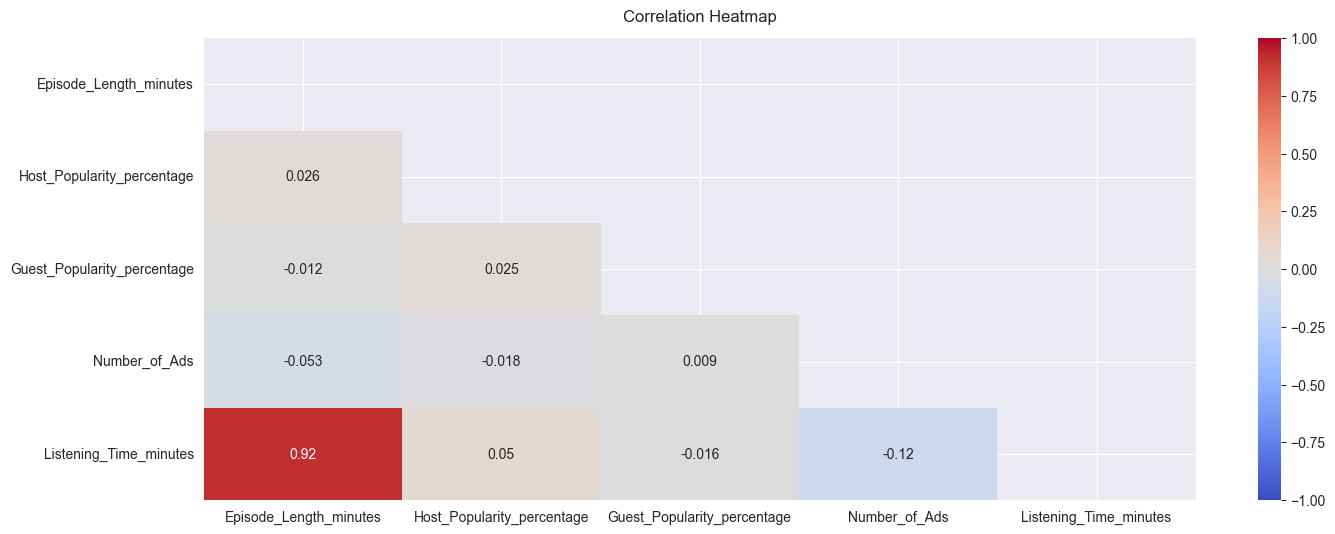

In [118]:
# Correlations Between Numeric Variables
selected_columns = data_train.loc[:, ~data_train.columns.isin(columns_cat)]

corr_matrix = selected_columns.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='coolwarm'
)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

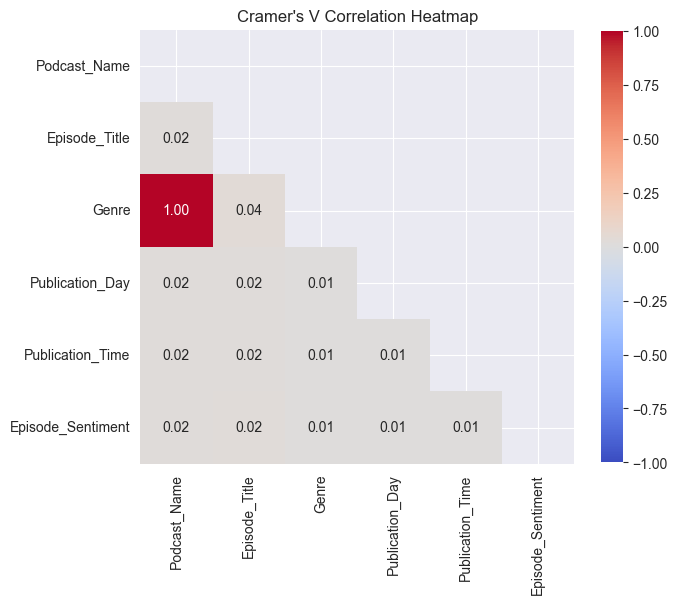

In [119]:
#Cramers V Categorical x Categorical

from scipy.stats import chi2_contingency
import warnings

def cramerV(label, x):
  confusion_matrix = pd.crosstab(label, x)
  chi2 = chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  r, k = confusion_matrix.shape
  phi2 = chi2 / n
  phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
  rcorr = r - ((r - 1) ** 2) / (n - 1)
  kcorr = k - ((k - 1) ** 2) / (n - 1)

  try:
      if min((kcorr - 1), (rcorr - 1)) == 0:
          warnings.warn("Unable to calculate Cramer's V using bias correction. Consider not using bias correction", RuntimeWarning)
          v = 0
      else:
          v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
  except:
      print("Error in Cramer's V calculation")
      v = 0
  return v

def plot_cramer(df):
  cramer = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
  for column_of_interest in df.columns:
      for column in df.columns:
          if column_of_interest != column:
              v = cramerV(df[column_of_interest], df[column])
              cramer.loc[column_of_interest, column] = v

  cramer.fillna(value=0, inplace=True)

  # Mask the upper triangle
  mask = np.triu(np.ones_like(cramer, dtype=bool))

  plt.figure(figsize=(7, 7))
  sns.heatmap(
      cramer,
      mask=mask,
      annot=True,
      fmt=".2f",
      cmap="coolwarm",
      square=True,
      cbar_kws={"shrink": .8},
      vmin=-1,  # Minimum value for the color scale
      vmax=1,    # Maximum value for the color scale
      linewidths=0,  # Remove gridlines between cells
      linecolor='none'  # Removes lines around cells
  )
  plt.title("Cramer's V Correlation Heatmap")
  plt.show()

selected_columns = data_train.loc[:, data_train.columns.isin(columns_cat)]
plot_cramer(selected_columns)


In [120]:
# Categorical X Numerical
import scipy.stats as stats

#One Way ANOVA
def anova_explorer(df, numeric_vars, categorical_vars, alpha=0.05):
    for num_var in numeric_vars:
        for cat_var in categorical_vars:
            # Drop rows with missing data
            sub_df = df[[num_var, cat_var]].dropna()

            # Group numeric variable by each category
            groups = [sub_df[num_var][sub_df[cat_var] == group] for group in sub_df[cat_var].unique()]

            if len(groups) < 2:
                continue  # Skip if not enough groups to compare

            # Perform one-way ANOVA
            f_stat, p_val = stats.f_oneway(*groups)

            if p_val < alpha:
                print(f"\nSignificant result for '{num_var}' vs '{cat_var}' (p = {p_val:.4f})")

                # Descriptive stats
                print(f"{'Category':<20} {'Mean':>10} {'Variance':>15} {'Sample Size':>15}")
                for group_name, group_data in sub_df.groupby(cat_var):
                    mean = group_data[num_var].mean()
                    var = group_data[num_var].var()
                    n = group_data[num_var].count()
                    print(f"{str(group_name):<20} {mean:10.2f} {var:15.2f} {n:15}")

                # Violin plot
                plt.figure(figsize=(8, 5))
                sns.violinplot(x=cat_var, y=num_var, data=sub_df)
                plt.title(f"Violin Plot: {num_var} by {cat_var}")
                plt.tight_layout()
                plt.show()

In [121]:
columns_cat = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
metric_features = (data_train.loc[:, ~data_train.columns.isin(columns_cat)]).columns
non_metric_features_chisquared = (data_train.loc[:, data_train.columns.isin(columns_cat)]).columns
#anova_explorer(data_train, metric_features, non_metric_features_chisquared)



In [122]:
##Last Feature Selection Before Model Training
#data_train = data_train.drop('Genre', axis=1)  #I can also try Podcast_Name if better results
display(data_train)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
1,24,19,1.696868,1,0.311207,2,0,0.914409,0.568587,0,1.563160
2,40,8,0.296545,2,0.443239,5,1,-1.665039,-1.168452,0,-0.019867
3,10,40,0.091225,8,-0.114181,1,2,1.020313,0.568587,2,0.029840
4,31,85,1.413448,3,0.884803,1,0,0.249329,1.437107,1,1.107505
5,14,11,-1.148321,3,-0.475302,2,0,-0.055940,1.437107,2,-0.833839
...,...,...,...,...,...,...,...,...,...,...,...
749995,26,18,0.350239,2,0.416570,2,2,-0.030016,-1.168452,0,0.419004
749996,2,14,0.352985,0,-1.076442,2,3,-0.243722,0.568587,1,-0.000133
749997,28,47,-1.012865,4,0.819662,4,2,1.258695,-1.168452,0,-1.109774
749998,41,42,1.366770,4,-0.631380,4,2,1.581414,-1.168452,0,2.030383


In [123]:
#Split Train Test
from sklearn.model_selection import train_test_split
#Data separation for stratification
X = data_train.drop('Listening_Time_minutes', axis=1)
y = data_train['Listening_Time_minutes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [124]:
#XgBOOST
numerical_features = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads'
]
categorical_features = [
    'Podcast_Name',
    'Episode_Title',
    'Genre',
    'Publication_Day',
    'Publication_Time',
    'Episode_Sentiment'
]
target = 'Listening_Time_minutes'


In [130]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization

def xgb_cv(max_depth, learning_rate, subsample, colsample_bytree, reg_alpha, reg_lambda):
    #Bayesian optimization objective function

    # 1. Define Hyperparameters for XGBoost
    params = {
        # Tunable parameters received as function arguments:
        'max_depth': int(max_depth),         # Max depth of a tree. Converted to int as optimization might pass floats.
        'learning_rate': learning_rate,    # Step size shrinkage to prevent overfitting.
        'subsample': subsample,            # Fraction of samples used for fitting the individual base learners.
        'colsample_bytree': colsample_bytree,# Fraction of features (columns) used when constructing each tree.
        'reg_alpha': reg_alpha,            # L1 regularization term on weights (Lasso).
        'reg_lambda': reg_lambda,          # L2 regularization term on weights (Ridge).

        # Fixed parameters for this CV run:
        'n_estimators': 10000,             # Max number of boosting rounds (trees). Large value used with early stopping.
        'eval_metric': 'rmse',             # Evaluation metric: Root Mean Squared Error. Used for early stopping.
        'early_stopping_rounds': 100,      # Stops training if validation metric ('rmse') doesn't improve for 100 rounds.
        #'tree_method': 'gpu_hist',         # Use GPU-accelerated histogram-based algorithm for tree construction (faster).
        #'gpu_id': 0                        # Use the first GPU (index 0).
    }

    # 2. Prepare for Cross-Validation
    cv_scores = []                         # List to store the RMSE score from each CV fold.
    # Set up 5-Fold Cross-Validation:
    # - n_splits=5: Split the data into 5 parts. Train on 4, validate on 1, repeat 5 times.
    # - shuffle=True: Shuffle the data before splitting to ensure random distribution.
    # - random_state=42: Ensures the shuffling is the same every time the code runs (reproducibility).
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # 3. Perform Cross-Validation Loop
    # Iterate through each fold defined by KFold.
    # kf.split(X_train) yields indices for training and validation sets for each fold.
    # Assumes X_train and y_train exist and are indexable (like pandas DataFrames/Series or NumPy arrays).
    for train_idx, val_idx in kf.split(X_train):
        # Split the data into training (tr) and validation (va) sets for the current fold
        x_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]
        x_va = X_train.iloc[val_idx]
        y_va = y_train.iloc[val_idx]

        # 4. Train XGBoost Model for the Current Fold
        # Create an XGBoost Regressor model instance with the defined parameters.
        # The **params syntax unpacks the dictionary into keyword arguments.
        model = xgb.XGBRegressor(**params)

        # Train the model:
        # - x_tr, y_tr: Training data for this fold.
        # - eval_set=[(x_va, y_va)]: Validation data used for monitoring 'eval_metric' and for early stopping.
        # - verbose=False: Suppress XGBoost's training progress messages for each round.
        model.fit(
            x_tr, y_tr,
            eval_set=[(x_va, y_va)],
            verbose=False)

        # 5. Evaluate the Model on the Validation Set for the Current Fold
        # Make predictions on the validation set (x_va).
        val_pred = model.predict(x_va)
        # Calculate the Root Mean Squared Error (RMSE) between actual values (y_va) and predictions (val_pred).
        # squared=False gives RMSE, otherwise it would be Mean Squared Error (MSE).
        mse = mean_squared_error(y_va, val_pred)
        val_rmse = np.sqrt(mse)

        # Store the RMSE for this fold.
        cv_scores.append(val_rmse)

    # 6. Calculate and Return the Overall Performance Metric
    # After iterating through all 10 folds, calculate the average RMSE across all folds.
    mean_rmse = np.mean(cv_scores)
    # Print the mean RMSE for monitoring purposes (useful during optimization).
    print(f"Mean RMSE: {mean_rmse:.3f}")

    # Return the *negative* mean RMSE.
    # Bayesian optimization libraries often work by *maximizing* an objective function.
    # Since we want to *minimize* RMSE, we return its negative value.
    # The optimization process will try to find hyperparameters that make this return value as large (close to zero) as possible.
    return -mean_rmse

#Search space for the hyperparameters you want to optimize
pbounds = {
    'max_depth': (5, 10),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.8, 1),
    'colsample_bytree': (0.8, 1),
    'reg_alpha': (0.1, 1),
    'reg_lambda': (0.1, 1)
}

#BayesianOptimization optimizer
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2)

#30 initial random otimizations, 60 iterations of Bayesian optimization
optimizer.maximize(init_points=15, n_iter=45)

best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
#best_params['tree_method'] = 'gpu_hist'
#best_params['gpu_id'] = 0
print('Optimal parameters::', best_params)


|   iter    |  target   | colsam... | learni... | max_depth | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------
Mean RMSE: 0.372
| 1         | -0.3715   | 0.8749    | 0.2857    | 15.98     | 0.6388    | 0.2404    | 0.8312    |


KeyboardInterrupt: 